## Ronald Asseko-Messa, Data Scientist
## Ames Housing dataset

Today let’s talk about a project that I worked on recently: Ames Housing dataset. The project looked at information from the Ames Assessor’s office in Iowa from 2006 to 2010 using different statistical modeling techniques to predict housing prices. The model is then submitted to a Kaggle competition where it is scored based on the root mean square error metric. Because of its different features, it’s really easy to be caught in between them, the models that can be used and the interpretation of the variables. 

                         House located in Northridge Heights, Ames, IA

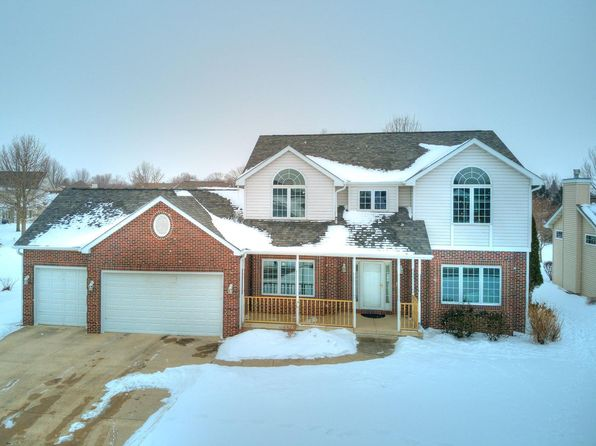





### Problem Statement
Which features of a house can best predict its price? By how much?

### Data Dictionary

Here are 22 variables (out of 81 and 2051 observations) I used to perform my analysis:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**saleprice**|*float*|AmesHousing|the property's sale price in dollars| 
|**overall_qual**|*float*| AmesHousing|Rates the overall material and finish of the house| 
|**neighborhood_high**|*float*| AmesHousing|neighborhood with sales price above 75th precentile| 
|**gr_liv_area**|*float*|AmesHousing| Above grade (ground) living area square feet| 
|**garage_area**|*float*| AmesHousing| Size of garage in square feet| 
|**garage_cars**|*float*| AmesHousing|Size of garage in car capacity| 
|**total_bsmt_sf**|*float*|AmesHousing|Total square feet of basement area| 
|**year_remod/add**|*float*|AmesHousing|Remodel date (same as construction date if no remodeling or additions)| 
|**1st_flr_sf**|*float*|AmesHousing|First Floor square feet| 
|**year_built**|*float*|AmesHousing|Original construction date| 
|**full_bath**|*float*|AmesHousing|Basement full bathrooms| 
|**garage_yr_blt**|*float*|AmesHousing|Year garage was built| 
|**mas_vnr_area**|*float*|AmesHousing|Masonry veneer area in square feet| 
|**totrms_abvgrd**|*float*|AmesHousing|Total rooms above grade (does not include bathrooms)| 
|**fireplaces**|*float*|AmesHousing|Number of fireplaces| 
|**bsmtfin_sf_1**|*float*|AmesHousing|Type 1 finished square feet| 
|**lot_frontage**|*float*|AmesHousing|Linear feet of street connected to property| 
|**open_porch_sf**|*float*|AmesHousing|Open porch area in square feet| 
|**wood_deck_sf**|*float*|AmesHousing|Wood deck area in square feet| 
|**renovated**|*float*|AmesHousing|Number of years between the year of sale and the last renovation/addition| 
|**neighborhood_very_low**|*float*|AmesHousing|neighborhood with sale price below 25th percentile| 
|**house_age**|*float*|AmesHousing|age of the house when sold| 

I have a background in economics and statistics, from which I developed a strong interest in the science of data. From that perspective I use econometric research and machine learning models to explore the data and make recommendations. 

### Loading the packages

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV 
from sklearn.linear_model import Lasso, LassoCV

%matplotlib inline

### Loading the data

In [27]:

# loading train data
train_data = pd.read_csv('./datasets/train.csv')

#transform the variables to lower cases and replace spaces with _
train_data.columns = train_data.columns.str.lower().str.replace(' ', '_')

#looking at the first 5 rows
train_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Data Cleaning & Analysis

From litterature reviews, along with common knowledge about houses, the basic idea is that prices are affected by their size, location, and nearby amenities. In other words, the larger the house, the more expensive it is, ceteris paribus (all else being equal). Similar approach between the location and sales price. We'd expect a house located in a well maintained neighborhood (i.e. good schools, access to amenities ...) to be more expensive than one that is relatively not, all else being equal. I also expect other factors like number of rooms, quality of the house and its age to affect sales price. Let's dive into Python to start our analysis.

In [28]:
# here are the number of observations, and columns, respectively
train_data.shape

(2051, 81)

In [53]:
#here I look at the top and bottom 10 prices, along with their location
print('Top 10')
print(train_data[['saleprice', 
                            'neighborhood']
                          ].sort_values(
    by='saleprice',ascending=False)[:10])

print('bottom 10')
print(train_data[['saleprice', 
            'neighborhood']
          ].sort_values(
    by='saleprice',ascending=True)[:10])

Top 10
      saleprice neighborhood
1671     611657      NridgHt
1964     591587      StoneBr
1692     584500      NoRidge
1796     582933      NridgHt
151      556581      StoneBr
1164     555000      NridgHt
623      552000      NridgHt
138      545224      StoneBr
823      538000      StoneBr
1592     535000      StoneBr
bottom 10
      saleprice neighborhood
1628      12789      OldTown
183       13100       IDOTRR
1309      34900       IDOTRR
1292      35000      Edwards
1518      35311       IDOTRR
1564      37900      OldTown
1428      39300      BrkSide
408       40000       IDOTRR
103       44000       IDOTRR
1089      45000      OldTown


In [57]:
# looking at sales price against square footage and house quality
train_data[['saleprice', 
            'gr_liv_area', 
            'garage_area', 
            'total_bsmt_sf', 
            '1st_flr_sf',
           'mas_vnr_area',
           'overall_qual']
          ].sort_values(
    by='saleprice',ascending=False)[:10]

,saleprice,gr_liv_area,garage_area,total_bsmt_sf,1st_flr_sf,mas_vnr_area,overall_qual
1671,611657,2364,820.0,2330.0,2364,760.0,9
1964,591587,2338,1110.0,2660.0,2338,710.0,9
1692,584500,3500,959.0,1733.0,1933,738.0,9
1796,582933,2822,1020.0,1734.0,1734,424.0,9
151,556581,2868,716.0,1992.0,1992,208.0,9
1164,555000,2402,672.0,3094.0,2402,200.0,10
623,552000,2492,949.0,2492.0,2492,730.0,10
138,545224,3390,758.0,1528.0,1528,662.0,10
823,538000,3279,841.0,1650.0,1690,603.0,8
1592,535000,2698,736.0,1850.0,1850,734.0,10


In [6]:
# counting the missing values before feature engineering
train_data.isna().sum().sort_values(ascending=False)[:30]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_yr_blt      114
garage_qual        114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
garage_cars          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
exter_qual           0
exterior_2nd         0
exterior_1st         0
roof_matl            0
dtype: int64

I

In [4]:
# create a column for the age of the house when sold  
train_data['house_age'] = train_data['yr_sold'] - train_data['year_built']
train_data['renovated'] = train_data['yr_sold'] - train_data['year_remod/add']
train_data.loc[:,['house_age', 'yr_sold', 'year_built', 'renovated', 'year_remod/add']][:3]

,house_age,yr_sold,year_built,renovated,year_remod/add
0,34,2010,1976,5,2005
1,13,2009,1996,12,1997
2,57,2010,1953,3,2007


In [444]:
# finding the IQR of sale price
np.percentile(train_data['saleprice'], (25,50,75, 100))

array([129825., 162500., 214000., 611657.])

In [966]:
# grouping neighborhood into 4 (based on IQR) by saleprice, by very+low to high
train_data['neighborhood_low_high'] = pd.cut(train_data['saleprice'], (0, 129825, 162500, 214000, 611657), 
                                             labels=['very_low', 'low', 'med', 'high'], ordered=True)



In [980]:
# grouping the neighborhood by from very low to high
train_data[['neighborhood_low_high', 'saleprice', 'overall_qual' ]].groupby(['neighborhood_low_high']).median().sort_values(
    by='saleprice', ascending=False)


,saleprice,overall_qual
neighborhood_low_high,,
high,270000,8
med,184000,6
low,144326,5
very_low,111250,5


In [65]:
# filling the NA values with the mean of its column
col = ['garage_yr_blt', 'garage_yr_blt','mas_vnr_area',
      'total_bsmt_sf','garage_cars','garage_area',
      'bsmtfin_sf_1','lot_frontage','bsmt_full_bath']

for i in train_data[col]:
    if i in train_data[col].isna():
        train_data[col].fillna(train_data[col].mean(), inplace=True)
print(train_data[col])

      garage_yr_blt  garage_yr_blt  mas_vnr_area  total_bsmt_sf  garage_cars  \
0            1976.0         1976.0         289.0          725.0          2.0   
1            1997.0         1997.0         132.0          913.0          2.0   
2            1953.0         1953.0           0.0         1057.0          1.0   
3            2007.0         2007.0           0.0          384.0          2.0   
4            1957.0         1957.0           0.0          676.0          2.0   
...             ...            ...           ...            ...          ...   
2046         2007.0         2007.0           0.0         1884.0          2.0   
2047         1961.0         1961.0           0.0          861.0          2.0   
2048         1929.0         1929.0           0.0          896.0          2.0   
2049         1956.0         1956.0           0.0         1200.0          1.0   
2050         1999.0         1999.0           0.0          994.0          2.0   

      garage_area  bsmtfin_sf_1  lot_fr

/Users/ronald_asseko_messa/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/ronald_asseko_messa/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [970]:
# filling the NA values with the mean of its column
col = ['garage_yr_blt', 'garage_yr_blt','mas_vnr_area',
      'total_bsmt_sf','garage_cars','garage_area',
      'bsmtfin_sf_1','lot_frontage','bsmt_full_bath']

for i in train_data[col]:
    if i.isnull:
        i.fillna(train_data[col].mean(), inplace=True)
return train_data[col]

train_data['garage_yr_blt'].fillna(train_data[
    'garage_yr_blt'].mean(), inplace=True)
train_data['mas_vnr_area'].fillna(train_data[
    'mas_vnr_area'].mean(), inplace=True)
train_data['total_bsmt_sf'].fillna(train_data[
    'total_bsmt_sf'].mean(), inplace=True)
train_data['garage_cars'].fillna(train_data[
    'garage_cars'].mean(), inplace=True)
train_data['garage_area'].fillna(train_data[
    'garage_area'].mean(), inplace=True)
train_data['bsmtfin_sf_1'].fillna(train_data[
    'bsmtfin_sf_1'].mean(), inplace=True)
train_data['lot_frontage'].fillna(train_data[
    'lot_frontage'].mean(), inplace=True)
train_data['bsmt_full_bath'].fillna(train_data[
    'bsmt_full_bath'].mean(), inplace=True)


In [968]:
# get dummies for neighborhoods (very low to high)
train_data = pd.concat([train_data, pd.get_dummies(train_data['neighborhood_low_high'], prefix='neighborhood')], axis=1)


In [971]:
# grouping the neighborhood by from very low to high
train_data['neighborhood_low_high'].unique()

['low', 'high', 'very_low', 'med']
Categories (4, object): ['very_low' < 'low' < 'med' < 'high']

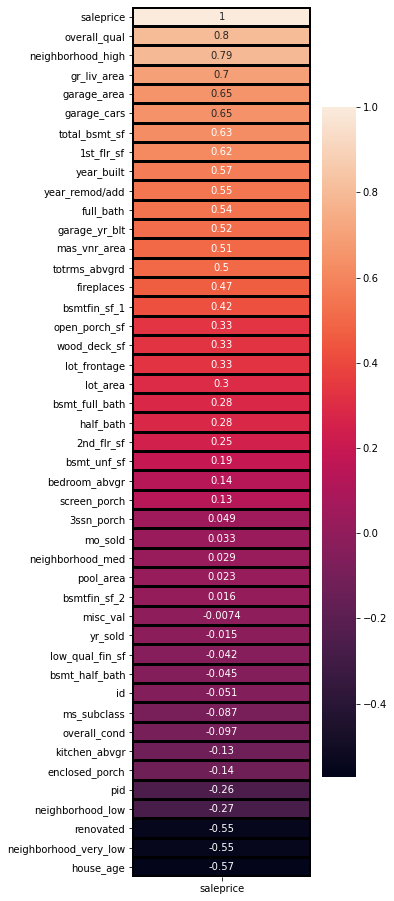

In [972]:
# plotting the correlation matrix between price and other numeric variables

corr_matrix = train_data.corr()[['saleprice']].sort_values(
    by='saleprice', ascending=False)

plt.figure(figsize=(4,16))
sns.heatmap(corr_matrix,
           annot=True,
           linecolor='black',
           linewidths=2);

In [973]:
# list of variables with corr above 0.3 in absolute value
corr_matrix_30_plus = corr_matrix[corr_matrix['saleprice'].abs() >= 0.3]
corr_matrix_30_plus.T.columns

Index(['saleprice', 'overall_qual', 'neighborhood_high', 'gr_liv_area',
       'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf',
       'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt',
       'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1',
       'open_porch_sf', 'wood_deck_sf', 'lot_frontage', 'renovated',
       'neighborhood_very_low', 'house_age'],
      dtype='object')

In [904]:
# grouping by neighborrhood to capture the unique values
train_data[train_data['neighborhood_low_high'] == 'very_low']['neighborhood'].unique() 

array(['NAmes', 'OldTown', 'BrDale', 'Sawyer', 'IDOTRR', 'MeadowV',
       'Edwards', 'BrkSide', 'SawyerW', 'Crawfor', 'CollgCr', 'NPkVill',
       'Mitchel', 'SWISU', 'NWAmes', 'Blueste'], dtype=object)

In [975]:
# correlation columns
corr_matrix_30_plus

,saleprice
saleprice,1.000000
overall_qual,0.800207
neighborhood_high,0.793240
gr_liv_area,0.697038
garage_area,0.650246
garage_cars,0.648197
total_bsmt_sf,0.628668
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370


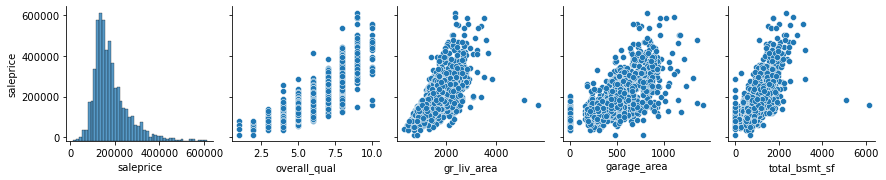

In [957]:

# plotting the Sale Price against variables with corr above 0.5
sns.pairplot(train_data, 
             y_vars=['saleprice'],
            x_vars=['saleprice', 'overall_qual', 'gr_liv_area',
       'garage_area', 'total_bsmt_sf'],
            height=2.5);

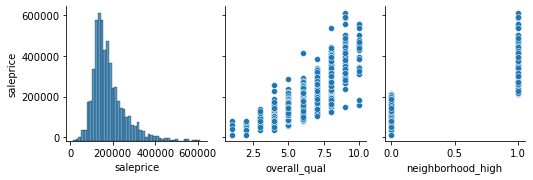

In [979]:

# plotting the Sale Price Sales against Quality and Neighborhoods High and Low
sns.pairplot(train_data, 
             y_vars=['saleprice'],
            x_vars=['saleprice', 'overall_qual', 'neighborhood_high'],
            height=2.5);

In [887]:
# train_data.select_dtypes(exclude='number').isna().sum()
train_data[corr_matrix_30_plus.T.columns].isnull().sum()

saleprice                0
overall_qual             0
neighborhood_high        0
gr_liv_area              0
garage_area              0
garage_cars              0
total_bsmt_sf            0
1st_flr_sf               0
year_built               0
year_remod/add           0
full_bath                0
garage_yr_blt            0
mas_vnr_area             0
totrms_abvgrd            0
fireplaces               0
bsmtfin_sf_1             0
lot_frontage             0
open_porch_sf            0
wood_deck_sf             0
renovated                0
neighborhood_very_low    0
house_age                0
dtype: int64

In [918]:
corr_matrix_30_plus.T.columns

Index(['saleprice', 'overall_qual', 'neighborhood_high', 'gr_liv_area',
       'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf',
       'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt',
       'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1',
       'lot_frontage', 'open_porch_sf', 'wood_deck_sf', 'renovated',
       'neighborhood_very_low', 'house_age'],
      dtype='object')

In [920]:

# creating X and Y variables for my prediction model
X = train_data[['overall_qual', 'neighborhood_high', 'gr_liv_area',
       'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf',
       'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt',
       'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1',
       'lot_frontage', 'open_porch_sf', 'wood_deck_sf', 'renovated',
       'neighborhood_very_low', 'house_age']]

# taking the log of saleprice given its large scale
y = np.log(train_data['saleprice'])

In [976]:

#creating a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# scaling the data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


Z_poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
Z_fit = Z_poly.fit_transform(Z_submission)

# initiating the linear regression
lr = LinearRegression()

# fit linear regression
lr.fit(Z_train, y_train)

# predict on Z_train
pred_train = lr.predict(Z_train)

# predict on Z_test
pred_test = lr.predict(Z_test)

# printing scores and mse for train data
print(f'train scores OLS: {(lr.score(Z_train, y_train))}')
print(f'rmse_train OLS: {mean_squared_error(y_train, pred_train, squared=False)}')


train scores OLS: 0.877514013798746
rmse_train OLS: 0.145341205984878


In [977]:
# printing scores and mse for train data
print(f'train scores OLS: {(lr.score(Z_train, y_train))}')
print(f'rmse_train OLS: {mean_squared_error(y_train, pred_train, squared=False)}')

print(f"Ridge CV Training R-Squared: {ridge_cv.score(Z_train, y_train)}")
print(f"Ridge CV Testing R-Squared: {ridge_cv.score(Z_test, y_test)}")

train scores OLS: 0.877514013798746
rmse_train OLS: 0.145341205984878
Ridge CV Training R-Squared: 0.8767084427713345
Ridge CV Testing R-Squared: 0.8802470402325949


In [922]:
# using ridge
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

# scaling Z_test and removing the log effect after the prediction 
rescaled_Z_test = sc.transform(Z_test)
pred_ridge = np.exp(ridge_cv.predict(Z_test))

pred_ridge.mean()


180032.2903844138

In [923]:
print(f"Ridge CV Training R-Squared: {ridge_cv.score(Z_train, y_train)}")
print(f"Ridge CV Testing R-Squared: {ridge_cv.score(Z_test, y_test)}")

Ridge CV Training R-Squared: 0.8767084427713345
Ridge CV Testing R-Squared: 0.8802470402325949


In [924]:
# printing the 
mean_squared_error(y_test, pred_ridge, squared=False)

192766.44912199993

### Submission Files

In [925]:
#loading test data
test_data = pd.read_csv('./datasets/test.csv')
test_data.columns = test_data.columns.str.lower().str.replace(' ', '_')

# creating house_age and renovated age variables
test_data['house_age'] = test_data['yr_sold'] - test_data['year_built']
test_data['renovated'] = test_data['yr_sold'] - test_data['year_remod/add']

#creating dummies for high_low_neighborhood
test_data['neighborhood_high'] = test_data['neighborhood'].map(lambda x: 1 if x in (
    'SawyerW', 'Somerst', 'StoneBr', 'NridgHt', 'NWAmes', 'Crawfor',
       'Veenker', 'CollgCr', 'NoRidge', 'ClearCr', 'Edwards', 'Mitchel',
       'NAmes', 'Gilbert', 'Blmngtn', 'Timber', 'BrkSide', 'Sawyer') else 0)
test_data['neighborhood_very_low'] = test_data['neighborhood'].map(lambda x: 1 if x in (
    'NAmes', 'OldTown', 'BrDale', 'Sawyer', 'IDOTRR', 'MeadowV',
       'Edwards', 'BrkSide', 'SawyerW', 'Crawfor', 'CollgCr', 'NPkVill',
       'Mitchel', 'SWISU', 'NWAmes', 'Blueste') else 0)


# creating columns feature
features = ['overall_qual', 'neighborhood_high', 'gr_liv_area',
       'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf',
       'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt',
       'mas_vnr_area', 'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1',
       'lot_frontage', 'open_porch_sf', 'wood_deck_sf', 'renovated',
       'neighborhood_very_low', 'house_age']

# replacing nan by zero
train_data['garage_yr_blt'].fillna(train_data[
    'garage_yr_blt'].mean(), inplace=True)
train_data['mas_vnr_area'].fillna(train_data[
    'mas_vnr_area'].mean(), inplace=True)
train_data['total_bsmt_sf'].fillna(train_data[
    'total_bsmt_sf'].mean(), inplace=True)
train_data['garage_cars'].fillna(train_data[
    'garage_cars'].mean(), inplace=True)
train_data['garage_area'].fillna(train_data[
    'garage_area'].mean(), inplace=True)
train_data['bsmtfin_sf_1'].fillna(train_data[
    'bsmtfin_sf_1'].mean(), inplace=True)
train_data['lot_frontage'].fillna(train_data[
    'lot_frontage'].mean(), inplace=True)
train_data['bsmt_full_bath'].fillna(train_data[
    'bsmt_full_bath'].mean(), inplace=True)

X2 = test_data[features]

In [927]:
# submission file
X_submission = X2

# scaling the model
sc = StandardScaler()
Z_submission = sc.fit_transform(X_submission)

In [708]:

Z_poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
Z_fit = Z_poly.fit_transform(Z_submission)

In [930]:
# predicting the prices
pred_ridge2 = np.exp(ridge_cv.predict(Z_submission))
pred_ridge2.mean()

176322.76584369814

In [ ]:
# model 1
# initiating the linear regression
lr = LinearRegression()

#predict values
pred_submission = cross_val_predict(estimator=lr, X=X_submission, y=None, cv=5)


# put data into kaggle's test data
test_data['SalePrice'] = pred_submission

#dataframe for submission
test_sub_model_1 = test_data[['Id', 'SalePrice']].sort_values(by='Id')

# write to csv

test_sub_model_1.to_csv('./datasets/test_sub_model_1.csv', index=False)

In [933]:
# model 7
# put data into kaggle's test data
test_data['SalePrice'] = pred_ridge2
# test_data['Id'] = pred_submission['id']

#dataframe for submission
test_sub_model_7 = test_data[['id', 'SalePrice']].sort_values(by='id')
test_sub_model_7.columns.str.capitalize()

# write to csv

test_sub_model_7.to_csv('./datasets/test_sub_model_7.csv', index=False)

